# Sentiment Analysis on IMDB Movie Reviews

## Project Description
This project focuses on **sentiment analysis**, which is a type of **Natural Language Processing (NLP)** task. The goal is to analyze movie reviews from the IMDB dataset and classify each review as either **positive** or **negative**. This is a common problem in text classification and is widely used in real-world applications such as product review analysis, social media monitoring, and customer feedback systems.

---

## Tools & Libraries Used
- **Python**: Programming language for data processing and machine learning.
- **Pandas**: For loading and handling datasets.
- **NLTK**: Natural Language Toolkit for text preprocessing and stopword removal.
- **Scikit-learn**: For feature extraction, model training, and evaluation.
- **WordCloud & Matplotlib**: For visualizing frequent words in positive and negative reviews.

---

## Step-by-Step Workflow

### 1. Loading the Dataset
- Loaded the IMDB movie reviews dataset into a Pandas DataFrame.
- Explored the data using `.head()`, `.shape`, and `.value_counts()` to understand its structure and balance betien positive and negative reviews.

### 2. Data Cleaning & Preprocessing
- Converted all text to lowercase.
- Removed HTML tags and non-alphabetical characters.
- Removed **stopwords** using NLTK to focus on meaningful words.
- Created a new column `cleaned_review` with the processed text for model training.

### 3. Feature Extraction
- Converted text data into numerical vectors using **TF-IDF** for Logistic Regression.
- For Naive Bayes, used **CountVectorizer** to convert text into a bag-of-words representation.
- Limited the number of features to 5000 to reduce computational complexity.

### 4. Label Encoding
- Converted the sentiment labels (`positive`/`negative`) into numeric format (`1`/`0`) for model training.

### 5. Splitting Data
- Split the dataset into **training** (80%) and **testing** (20%) sets to evaluate model performance on unseen data.

### 6. Model Training & Evaluation
- **Logistic Regression**
  - Trained the model on TF-IDF features.
  - Evaluated accuracy, precision, recall, and F1-score.
  - Achieved an **accuracy of 88.68%**, slightly better than Naive Bayes.
  
- **Naive Bayes**
  - Trained the model on CountVectorizer features.
  - Evaluated the same metrics for comparison.
  - Achieved an **accuracy of 84.48%**, slightly lower but faster to train.

### 7. Bonus: Word Cloud Visualization
- Generated word clouds for positive and negative reviews.
- Helped visualize the most frequent words in each sentiment category.
- Provided qualitative insight into what words influence the model predictions.

---

## Summary of Results
- **Logistic Regression** outperformed **Naive Bayes** in this dataset.
- Both models are effective for sentiment classification.
- Preprocessing, feature extraction, and proper evaluation are key to building a successful NLP pipeline.
- Word cloud visualization adds interpretability by showing which words dominate each class.

---

## Key Takeaways
- Preprocessing text (cleaning, stopwords removal) is critical for good performance.
- Logistic Regression tends to be more accurate on TF-IDF features, while Naive Bayes is simpler and faster.
- Visualizations can help understand dataset characteristics and model behavior.
- The workflow used here can be extended to other datasets or languages for sentiment analysis tasks.


---


## 1️⃣ Load and Preview Dataset

In this step, i load the IMDB movie reviews dataset from a CSV file and preview the first few rows to understand its structure.


In [ ]:
import pandas as pd

# Load the IMDB movie reviews dataset from CSV file
df = pd.read_csv("IMDB Dataset.csv")

# Link of Data: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download

# Display the first 5 rows to inspect the data
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## 2️⃣ Explore the Dataset

Here I perform some basic exploration to understand the dataset:

- `df.shape` → Check the number of rows and columns.
- `df.isnull().sum()` → Check for any missing values.
- `df['sentiment'].value_counts()` → Count how many positive and negative reviews are present.


In [ ]:
# Check the number of rows and columns in the dataset
df.shape

# Check for missing values in each column
df.isnull().sum()

# Count the number of positive and negative reviews
df['sentiment'].value_counts()


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## 3️⃣ Text Cleaning & Preprocessing

In this step, i clean the review text to make it suitable for modeling:

- Import `re` for regular expressions and `nltk` for text processing.
- Download English stopwords using NLTK.
- Define a `clean_text` function:
  1. Convert text to lowercase.
  2. Remove HTML tags (`<.*?>`).
  3. Remove any non-alphabetic characters.
  4. Split text into words and remove stopwords.
  5. Join words back into a cleaned string.
- Apply this function to the `review` column and store results in `cleaned_review`.


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

# Download English stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    words = text.split()  # Split text into words
    words = [w for w in words if w not in stop_words]  # Remove stopwords
    return ' '.join(words)  # Join words back to string

# Apply cleaning function to the review column
df['cleaned_review'] = df['review'].apply(clean_text)

# Display the first few rows to verify cleaning
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aboal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


## 4️⃣ Text Vectorization using TF-IDF

Here i convert the cleaned text into numerical features for machine learning:

- Import `TfidfVectorizer` from `sklearn`.
- Initialize the vectorizer with a maximum of 5000 features.
- Fit the vectorizer on `cleaned_review` and transform the text into a TF-IDF matrix `X`.
- Print the shape of `X` to see the number of samples and features.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  

# Transform cleaned text into TF-IDF features
X = vectorizer.fit_transform(df['cleaned_review'])

# Display shape of feature matrix
print(X.shape)  # (number of reviews, number of features)


(50000, 5000)


## 5️⃣ Encode Target Labels

Here i convert the sentiment labels (`positive`/`negative`) into numerical values:

- Import `LabelEncoder` from `sklearn.preprocessing`.
- Initialize the encoder.
- Fit and transform the `sentiment` column:
  - `positive` → 1
  - `negative` → 0
- Store the encoded labels in `y`.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Encode sentiment labels to numerical values
y = le.fit_transform(df['sentiment'])  # positive -> 1, negative -> 0


## 6️⃣ Split Dataset into Training and Testing Sets

I split the data into training and testing sets to evaluate our model's performance on unseen data:

- `train_test_split` from `sklearn.model_selection` is used.
- `test_size=0.2` → 20% of the data is reserved for testing.
- `random_state=42` ensures reproducibility.
- `X_train`, `X_test` → feature matrices for training and testing.
- `y_train`, `y_test` → target labels for training and testing.


In [ ]:
from sklearn.model_selection import train_test_split

# Split features and labels into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 7️⃣ Train Logistic Regression Model & Evaluate

Here i train a **Logistic Regression** model for sentiment classification:

- `LogisticRegression()` → initializes the model.
- `model.fit(X_train, y_train)` → trains the model on training data.
- `model.predict(X_test)` → predicts labels for the test set.
- `accuracy_score(y_test, y_pred)` → calculates overall accuracy.
- `classification_report(y_test, y_pred)` → shows precision, recall, F1-score for each class.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))  # Print overall accuracy
print(classification_report(y_test, y_pred))       # Print precision, recall, f1-score


Accuracy: 0.8868
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Bonus

## 8️⃣ Install WordCloud Library

I need the **WordCloud** library to visualize the most frequent words in positive and negative reviews.

- `%pip install wordcloud` → installs the WordCloud Python package.


In [ ]:
# Install the WordCloud library for visualizations
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## 9️⃣ Visualize Most Frequent Words with WordCloud

Here, i create word clouds for positive and negative reviews to see which words appear most frequently.

Steps:
1. Filter reviews by sentiment (`positive` and `negative`).
2. Combine all reviews of each sentiment into a single string.
3. Generate word clouds using `WordCloud`.
4. Plot the word clouds with `matplotlib`.


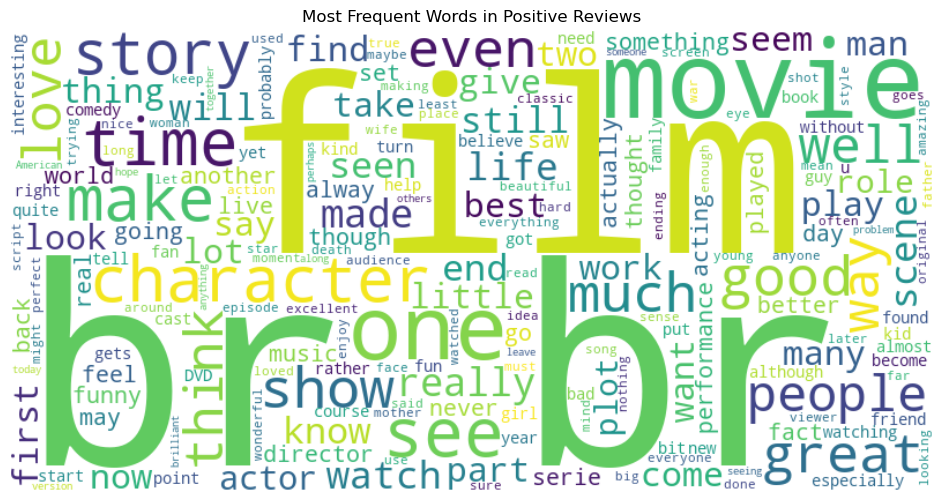

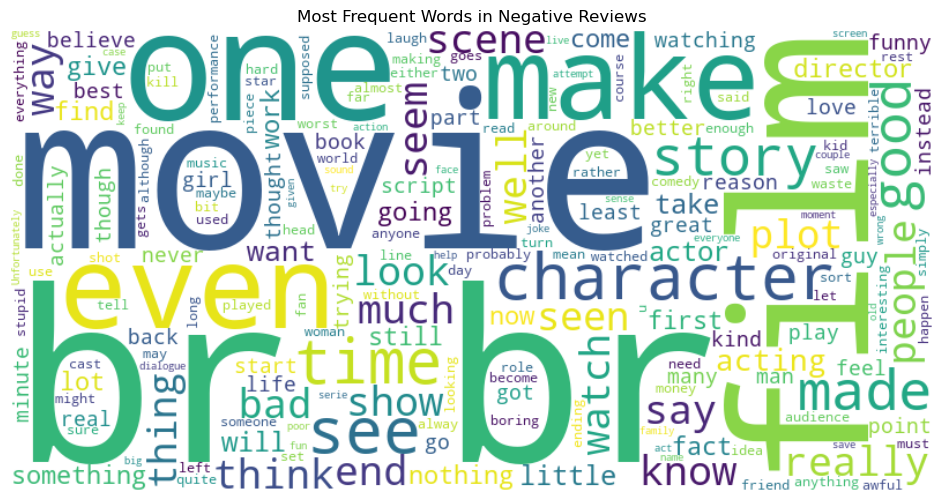

In [ ]:
# Libraries for word cloud visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate positive and negative reviews
positive_reviews = df[df['sentiment']=='positive']['review']  # Filter positive reviews
negative_reviews = df[df['sentiment']=='negative']['review']  # Filter negative reviews

# Combine all reviews into a single string for each sentiment
positive_text = " ".join(positive_reviews)  # Merge all positive reviews
negative_text = " ".join(negative_reviews)  # Merge all negative reviews

# Create word clouds for each sentiment
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot positive word cloud
plt.figure(figsize=(12,6))
plt.imshow(positive_wc, interpolation='bilinear')  # Show the word cloud
plt.axis('off')  # Remove axes
plt.title("Most Frequent Words in Positive Reviews")  # Add title
plt.show()

# Plot negative word cloud
plt.figure(figsize=(12,6))
plt.imshow(negative_wc, interpolation='bilinear')  # Show the word cloud
plt.axis('off')  # Remove axes
plt.title("Most Frequent Words in Negative Reviews")  # Add title
plt.show()


## 🔟 Sentiment Analysis with Naive Bayes

In this part, i train a **Naive Bayes classifier** and compare its performance with Logistic Regression.

Steps:
1. Load the dataset.
2. Split reviews into training and testing sets.
3. Convert text to numerical features using **CountVectorizer**.
4. Train a **Multinomial Naive Bayes** classifier.
5. Predict sentiments on the test set and evaluate accuracy and classification report.


In [ ]:
# Libraries for Naive Bayes sentiment analysis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the dataset
df = pd.read_csv('IMDB Dataset.csv')  # Load IMDB reviews dataset

# 2. Split into train and test
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)  # 80% train, 20% test

# 3. Convert text to numerical features using CountVectorizer
vectorizer_nb = CountVectorizer(stop_words='english', max_features=5000)  # Convert text to count vectors
X_train_nb = vectorizer_nb.fit_transform(X_train_text)  # Fit and transform training data
X_test_nb = vectorizer_nb.transform(X_test_text)  # Transform test data

# 4. Train Naive Bayes classifier
nb_model = MultinomialNB()  # Initialize Multinomial Naive Bayes
nb_model.fit(X_train_nb, y_train)  # Train the model

# 5. Predict and evaluate
y_pred = nb_model.predict(X_test_nb)  # Predict test set labels

accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
print(f"Accuracy: {accuracy:.4f}\n")  # Print accuracy
print(classification_report(y_test, y_pred))  # Print detailed metrics


Accuracy: 0.8448

              precision    recall  f1-score   support

    negative       0.84      0.85      0.84      4961
    positive       0.85      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## 📊 Comparing Logistic Regression vs Naive Bayes

Here’s a comparison of the two classifiers i trained on the IMDB dataset:

| Metric       | Logistic Regression | Naive Bayes |
|-------------|------------------|------------|
| Accuracy     | 0.8868           | 0.8448     |
| Precision    | 0.88–0.90        | 0.84–0.85  |
| Recall       | 0.87–0.90        | 0.84       |
| F1-score     | 0.88–0.89        | 0.84       |

**Observations:**
- Logistic Regression performs slightly better in terms of accuracy, precision, and F1-score.
- Naive Bayes is simpler and faster but slightly less accurate on this dataset.
- Both models can effectively distinguish between positive and negative reviews, but Logistic Regression gives a more balanced performance.


In [ ]:
# Make the Model

import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
